##  Build a machine learning model to predict salary  based on position for a given dataset


### Data Preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn import metrics
import sys
sys.path.append('/home/admin1/PycharmProjects/Machine Learning using libraries/')
from ipynb.fs.full.ml_library import *

# reading dataset file & storing it as pandas dataframe
salary_data = pd.read_csv('Position_Salaries.csv')
salary_data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


#### Plotting Salary vs Level

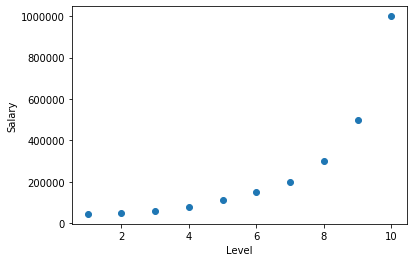

In [2]:
plt.scatter(salary_data['Level'], salary_data['Salary'])
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

#### Separating out feature & label columns

In [3]:
x_values = salary_data['Level'].values.reshape(-1,1)
y_values = salary_data['Salary'].values

#### Splitting dataset into train set & test set

In [4]:
train_x_values, test_x_values, train_y_values, test_y_values = train_test_split(x_values, y_values, train_size=0.7, random_state=0)

### Buiding Support Vector Regression model

In [5]:
regressor = SVR(kernel='poly', degree=7)
regressor.fit(train_x_values, train_y_values)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=7, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

#### Storing predictions for test set

In [6]:
test_prediction = regressor.predict(test_x_values)
train_prediction = regressor.predict(train_x_values)

#### Plotting model against data points

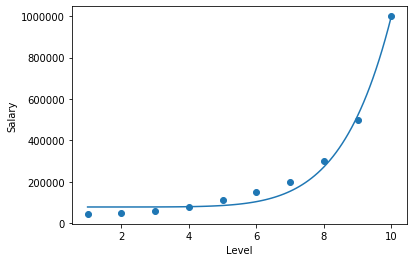

In [7]:
plt.scatter(salary_data['Level'], salary_data['Salary'])
plt.plot(np.linspace(1,10,100), regressor.predict(np.linspace(1,10,100).reshape(-1,1)))
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

#### Calculating errors

In [8]:
mean_abs_error = metrics.mean_absolute_error(test_y_values, test_prediction)
mean_abs_error

20749.30523051634

In [9]:
mean_sqr_error = metrics.mean_squared_error(test_y_values, test_prediction)
mean_sqr_error

436925508.15555745

In [10]:
root_mean_sq_error = np.sqrt(mean_sqr_error)
root_mean_sq_error

20902.763170345625

### Evaluating model against test set

In [11]:
print(f'r2_score: {metrics.r2_score(test_y_values, test_prediction)}')

r2_score: 0.9887066927817346


In [12]:
accuracy_test = accuracy_regression(test_prediction, test_y_values)
accuracy_test

80.96581414281172